In [1]:
import pandas as pd                     
import numpy as np                      
import matplotlib.pyplot as plt         
      
from sklearn.metrics import silhouette_samples, silhouette_score 

### Step1 导入数据集

In [2]:
data_3 = pd.read_csv('iBeacon_RSSI_Unlabeled.csv') 

In [3]:
data_3.head(5)

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,?,11-7-2016 12:29:01,-200,-200,-80,-200,-77,-56,-81,-200,-200,-200,-200,-200,-200
1,?,11-7-2016 12:29:00,-200,-200,-80,-200,-78,-56,-200,-200,-200,-200,-200,-200,-200
2,?,11-7-2016 12:28:59,-200,-200,-81,-200,-74,-63,-200,-200,-200,-200,-200,-200,-200
3,?,11-7-2016 12:28:58,-200,-200,-200,-200,-75,-56,-200,-200,-200,-200,-200,-200,-200
4,?,11-7-2016 12:28:57,-200,-200,-200,-200,-82,-56,-200,-200,-200,-200,-200,-200,-200


In [4]:
del data_3['location']

In [5]:
del data_3['date']

In [6]:
data_3.head(5)

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,-200,-200,-80,-200,-77,-56,-81,-200,-200,-200,-200,-200,-200
1,-200,-200,-80,-200,-78,-56,-200,-200,-200,-200,-200,-200,-200
2,-200,-200,-81,-200,-74,-63,-200,-200,-200,-200,-200,-200,-200
3,-200,-200,-200,-200,-75,-56,-200,-200,-200,-200,-200,-200,-200
4,-200,-200,-200,-200,-82,-56,-200,-200,-200,-200,-200,-200,-200


In [7]:
print(data_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5191 entries, 0 to 5190
Data columns (total 13 columns):
b3001    5191 non-null int64
b3002    5191 non-null int64
b3003    5191 non-null int64
b3004    5191 non-null int64
b3005    5191 non-null int64
b3006    5191 non-null int64
b3007    5191 non-null int64
b3008    5191 non-null int64
b3009    5191 non-null int64
b3010    5191 non-null int64
b3011    5191 non-null int64
b3012    5191 non-null int64
b3013    5191 non-null int64
dtypes: int64(13)
memory usage: 527.3 KB
None


### Step 2 聚类分析

### Way-1: DBScan

In [9]:
n_samples = data_3

In [10]:
#降维处理
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(n_samples)

In [34]:
from sklearn.cluster import DBSCAN

dbscan_cluster = DBSCAN(eps=100, min_samples=10).fit(n_samples)

In [35]:
dbscan_cluster.labels_

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [36]:
labels = np.unique(dbscan_cluster.labels_)
print(labels)

[-1  0  1  2  3  4  5  6  7  8]


In [37]:
dbscan_cluster

DBSCAN(algorithm='auto', eps=100, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=1, p=None)

In [38]:
#Silhouette Coefficient 轮廓系数进行评估
db_si_score=silhouette_score(n_samples,dbscan_cluster.labels_,metric='euclidean')
print('DBScan_si_score: {:.4f}'.format(db_si_score))

DBScan_si_score: -0.1637


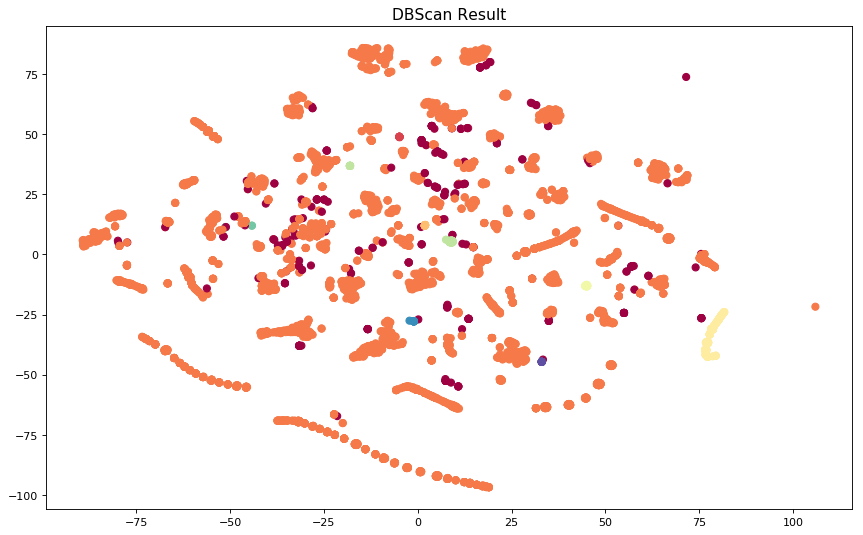

In [85]:
# 可视化展示
plt.figure(figsize=(13, 8), dpi=80)  
plt.title('DBScan Result',fontsize = 14)
plt.scatter(X_embedded[:,0],X_embedded[:,1], c = dbscan_cluster.labels_,s = 40 ,cmap = plt.cm.Spectral)

### Way-2: K-Means算法

In [70]:
from sklearn.cluster import KMeans

KM_cluster = KMeans(n_clusters=20, random_state=10).fit(n_samples)

In [71]:
KM_cluster.labels_

array([18, 18, 18, ...,  3,  3,  3])

In [72]:
labels = np.unique(KM_cluster.labels_)
print(labels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [73]:
#Silhouette Coefficient 轮廓系数进行评估
KM_si_score=silhouette_score(n_samples,KM_cluster.labels_,metric='euclidean')
print('K-Means_si_score: {:.4f}'.format(KM_si_score))

K-Means_si_score: 0.4140


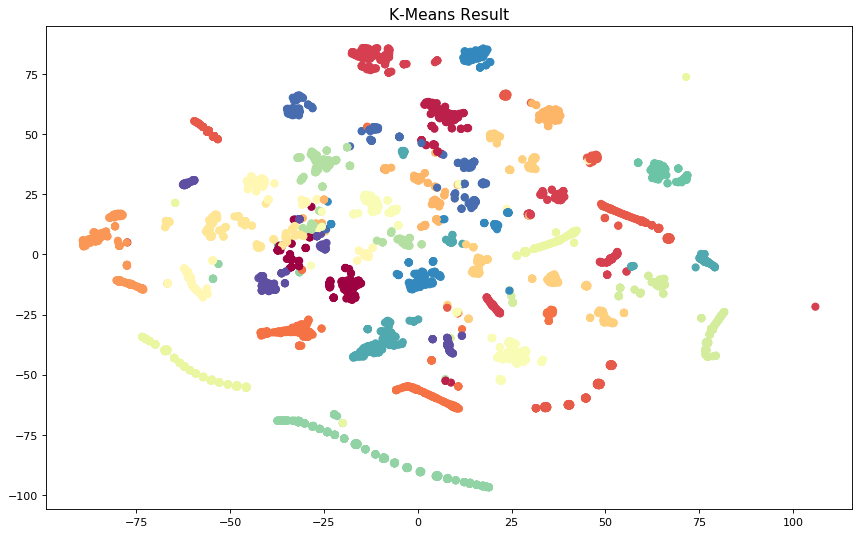

In [74]:
# 可视化展示
plt.figure(figsize=(13, 8), dpi=80)  
plt.title('K-Means Result',fontsize = 14)
plt.scatter(X_embedded[:,0],X_embedded[:,1], c = KM_cluster.labels_,s = 40 ,cmap = plt.cm.Spectral)

### Way-3:GMM

In [65]:
from sklearn import mixture

gmm_cluster = mixture.GaussianMixture(n_components=20).fit(n_samples)

In [66]:
gmm_cluster_labels = gmm_cluster.predict(n_samples)

In [67]:
labels = np.unique(gmm_cluster_labels)
print(labels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [68]:
#Silhouette Coefficient 轮廓系数进行评估
gmm_si_score=silhouette_score(n_samples,gmm_cluster_labels,metric='euclidean')
print('GMM_si_score: {:.4f}'.format(gmm_si_score))

GMM_si_score: 0.2557


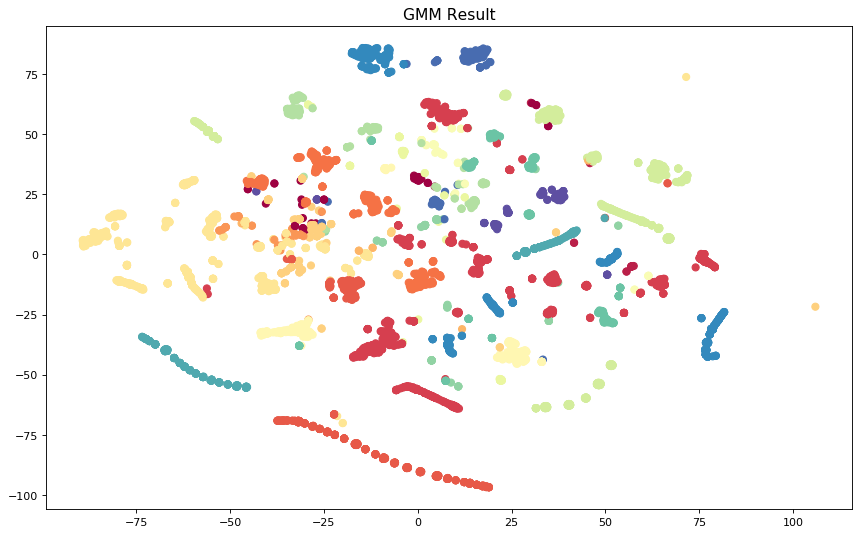

In [69]:
# 可视化展示
plt.figure(figsize=(13, 8), dpi=80)  
plt.title('GMM Result',fontsize = 14)
plt.scatter(X_embedded[:,0],X_embedded[:,1], c = gmm_cluster_labels,s = 40 ,cmap = plt.cm.Spectral)

### Way-4: 层次聚类算法

In [76]:
from sklearn.cluster import AgglomerativeClustering

AC_cluster = AgglomerativeClustering(n_clusters=20).fit(n_samples)

In [77]:
AC_cluster

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=20,
            pooling_func=<function mean at 0x000002D516CC0598>)

In [78]:
AC_cluster.labels_

array([ 0, 11, 11, ...,  2,  2,  2], dtype=int64)

In [79]:
labels = np.unique(AC_cluster.labels_)
print(labels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [80]:
#Silhouette Coefficient 轮廓系数进行评估
hierac_si_score=silhouette_score(n_samples,AC_cluster.labels_,metric='euclidean')
print('Hierac_si_score: {:.4f}'.format(hierac_si_score))

Hierac_si_score: 0.3578


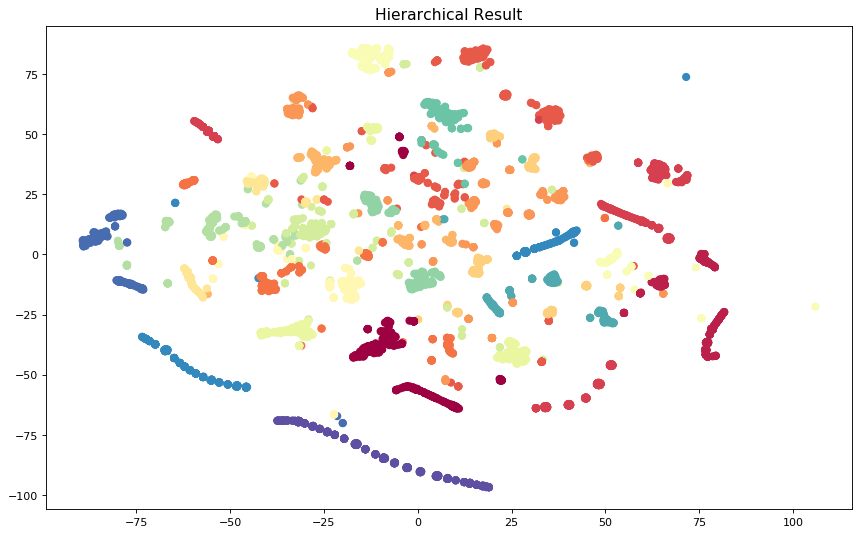

In [82]:
# 可视化展示
plt.figure(figsize=(13, 8), dpi=80)  
plt.title('Hierarchical Result',fontsize = 14)
plt.scatter(X_embedded[:,0],X_embedded[:,1], c = AC_cluster.labels_,s = 40 ,cmap = plt.cm.Spectral)